# Tumor stages, grades, trends

## 1. Loading and cleaning Tumour dataset

In [13]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Load the tumour dataset
tumour_data = pd.read_csv("C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_tumour.csv", low_memory=False)

# Load lookup tables
lookup_file_path = "C:/Users/wardo/Documents/Internship/cancer_download/Documents/all_z_lookup_tables.xlsx"
zstage_lookup = pd.read_excel(lookup_file_path, sheet_name="zstage")
zgrade_lookup = pd.read_excel(lookup_file_path, sheet_name="zgrade")

# Clean and map tumour stage data
zstage_mapping = dict(zip(zstage_lookup["Code"], zstage_lookup["Description"]))
tumour_data["STAGE_BEST_DESCRIPTION"] = tumour_data["STAGE_BEST"].map(zstage_mapping).fillna("Unknown")

# Clean and map tumour grade data
zgrade_mapping = dict(zip(zgrade_lookup["Code"], zgrade_lookup["Description"]))
tumour_data["GRADE_CLEANED"] = tumour_data["GRADE"].astype(str).str.replace("^G", "", regex=True)
tumour_data["GRADE_DESCRIPTION"] = tumour_data["GRADE_CLEANED"].map(zgrade_mapping).fillna("Unspecified")

# Debugging: Check unmatched grade values
unmatched_grades = tumour_data[tumour_data["GRADE_DESCRIPTION"] == "Unspecified"]["GRADE_CLEANED"].unique()
print("\nUnmatched GRADE_CLEANED values mapped to 'Unspecified':")
print(unmatched_grades)

# Output the first few rows to verify transformations
print("\nFirst few rows of the processed dataset:")
print(tumour_data[["STAGE_BEST", "STAGE_BEST_DESCRIPTION", "GRADE", "GRADE_CLEANED", "GRADE_DESCRIPTION"]].head())



Unmatched GRADE_CLEANED values mapped to 'Unspecified':
['']

First few rows of the processed dataset:
  STAGE_BEST STAGE_BEST_DESCRIPTION GRADE GRADE_CLEANED  \
0          ?      INSUFFICIENT INFO    G3             3   
1          ?      INSUFFICIENT INFO    GX             X   
2          ?      INSUFFICIENT INFO    G2             2   
3          ?      INSUFFICIENT INFO    GX             X   
4          ?      INSUFFICIENT INFO    G2             2   

                    GRADE_DESCRIPTION  
0     3 / III / POORLY DIFFERENTIATED  
1                                   X  
2  2 / II / MODERATELY DIFFERENTIATED  
3                                   X  
4  2 / II / MODERATELY DIFFERENTIATED  


The dataset has been processed to include descriptive mappings for tumor stages and grades. Stages are mapped to human-readable descriptions using the lookup table, with cases marked as "Insufficient Info" (STAGE_BEST = ?) for missing or ambiguous data. Tumor grades are cleaned by removing the leading "G" from their values and mapped to detailed descriptions. For example, G3 is mapped to "3 / III / Poorly Differentiated," and G2 is mapped to "2 / II / Moderately Differentiated." However, unmatched or empty grades are labeled as "Unspecified" or retain raw values (e.g., GX = X). This transformation helps standardize and interpret tumor characteristics for analysis.

## 2. Visualize Tumor Stages

### 2.1 Stage Distribution (Visualize the distribution of tumor stages)

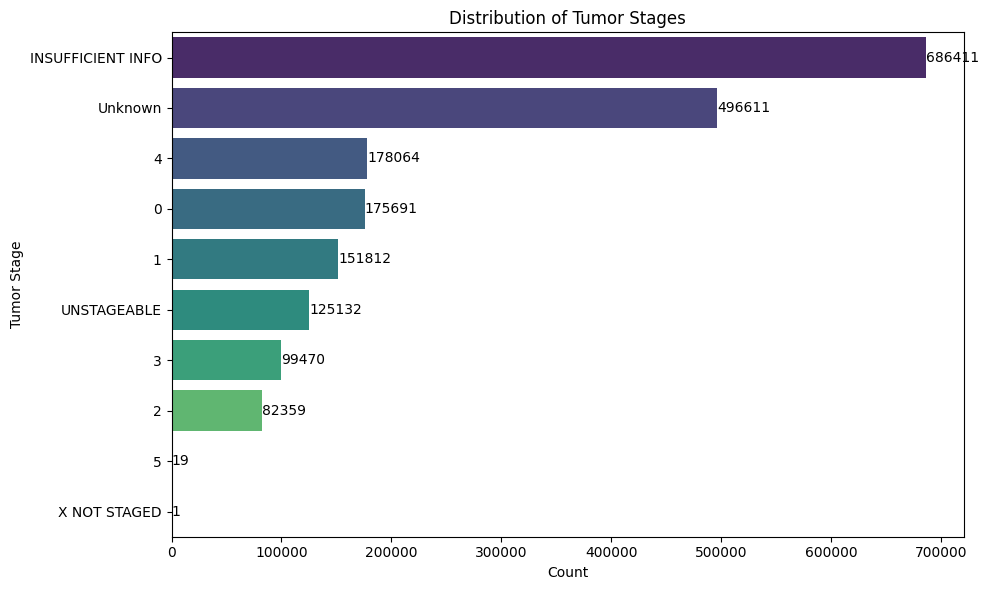

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stage Distribution with Counts
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    y="STAGE_BEST_DESCRIPTION",
    data=tumour_data,
    order=tumour_data["STAGE_BEST_DESCRIPTION"].value_counts().index,
    palette="viridis"
)

# Add counts to the bars
for bar in ax.patches:
    plt.text(
        bar.get_width() + 5,  # Position to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Centered vertically on the bar
        int(bar.get_width()),  # Actual count
        va="center",  # Vertical alignment
        fontsize=10,  # Font size
        color="black"  # Text color
    )

plt.title("Distribution of Tumor Stages")
plt.xlabel("Count")
plt.ylabel("Tumor Stage")
plt.tight_layout()
plt.show()


This chart shows the distribution of tumor stages across patients. The stages represent the progression of cancer, from early stages (like 0 and 1) to advanced stages (like 3 and 4). Many cases are marked as 'Insufficient Information' or 'Unknown,' meaning the stage could not be determined due to missing or incomplete data. For the cases with clear staging, Stage 3 and Stage 4 are more common, while early stages like 0 and 1 have fewer cases. This highlights the importance of improving data collection for better understanding and treatment planning.

### 2.2 Stage Trends (Analyze tumor stage trends over time)

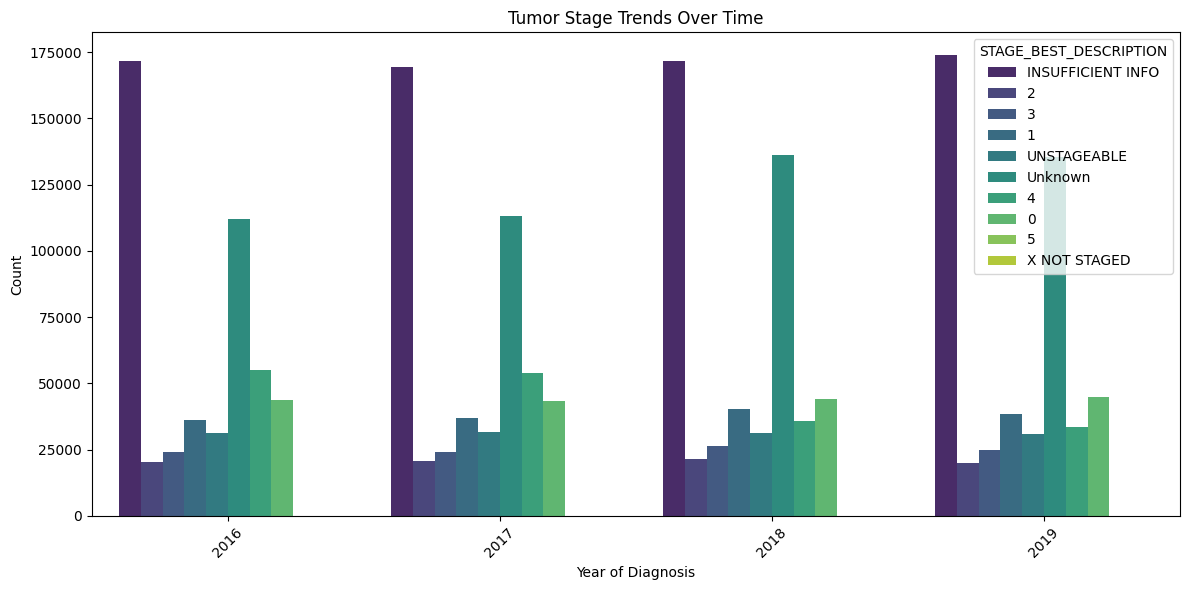

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Print column names to verify the dataset structure
#print("Column names in the dataset:")
#print(tumour_data.columns)

# Ensure DIAGNOSISDATEBEST column exists
if "DIAGNOSISDATEBEST" in tumour_data.columns:
    # Convert DIAGNOSISDATEBEST to datetime, handling errors
    tumour_data["DIAGNOSISDATEBEST"] = pd.to_datetime(tumour_data["DIAGNOSISDATEBEST"], errors="coerce")

    # Drop rows with invalid or missing dates
    tumour_data = tumour_data[tumour_data["DIAGNOSISDATEBEST"].notnull()]

    # Extract the year from DIAGNOSISDATEBEST
    tumour_data["DIAGNOSIS_YEAR"] = tumour_data["DIAGNOSISDATEBEST"].dt.year

    # Plot stage trends over time
    plt.figure(figsize=(12, 6))
    sns.countplot(
        x="DIAGNOSIS_YEAR", 
        hue="STAGE_BEST_DESCRIPTION", 
        data=tumour_data, 
        palette="viridis"
    )
    plt.title("Tumor Stage Trends Over Time")
    plt.xlabel("Year of Diagnosis")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("DIAGNOSISDATEBEST column not found in the dataset.")


This chart shows how tumor stages are distributed over time, from 2016 to 2019, based on the year of diagnosis. Each bar represents the total number of cases diagnosed in a given year, broken down by tumor stage. For example, the purple section labeled 'Insufficient Info' means many cases lacked detailed staging information. Other sections, like 'Stage 2,' 'Stage 3,' or 'Unstageable,' show cases where staging was determined. This visualization highlights trends in cancer diagnosis over the years, emphasizing the importance of complete data collection for better analysis.

## 3. Visualize Tumor Grades

### 3.1 Grade Distribution (Visualize the distribution of tumor grades)

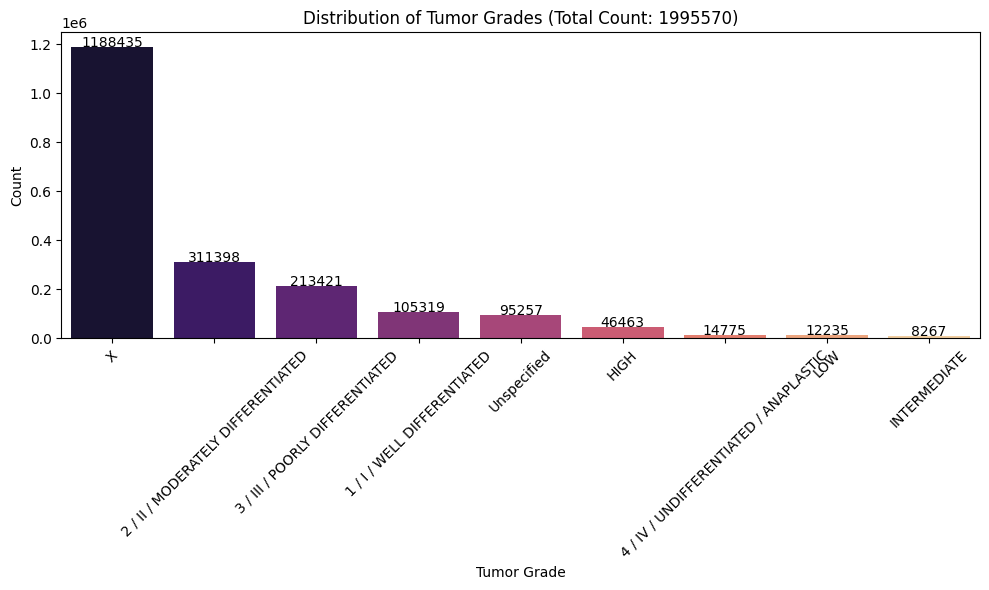

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grade Distribution with Counts and Total
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x="GRADE_DESCRIPTION",
    data=tumour_data,
    order=tumour_data["GRADE_DESCRIPTION"].value_counts().index,
    palette="magma"
)

# Add counts to the bars
for bar in ax.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Centered horizontally on the bar
        bar.get_height() + 5,  # Positioned slightly above the bar
        int(bar.get_height()),  # Actual count
        ha="center",  # Horizontal alignment
        fontsize=10,  # Font size
        color="black"  # Text color
    )

# Add total count to the title
total_count = tumour_data["GRADE_DESCRIPTION"].value_counts().sum()
plt.title(f"Distribution of Tumor Grades (Total Count: {total_count})")
plt.xlabel("Tumor Grade")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This chart shows how different tumor grades are distributed in the dataset. Tumor grades describe how abnormal the cancer cells look under a microscope, which helps predict how quickly the tumor might grow or spread. For example: **Grade 2** (Moderately Differentiated) is the most common, indicating tumors with moderate abnormalities. **Grades 3 and 1** are also frequent, showing poorly and well-differentiated tumors, respectively. Some cases are marked **Unspecified** due to incomplete data. The total count at the top of the chart indicates all tumors analyzed. This chart helps understand the overall characteristics of the tumors

## 3.2 Grade Trends (Analyze tumor grade trends over time)

Unique DIAGNOSIS_YEAR values:
[2017 2016 2018 2019]
Unique GRADE_DESCRIPTION values:
['3 / III / POORLY DIFFERENTIATED' 'X'
 '2 / II / MODERATELY DIFFERENTIATED' '1 / I / WELL DIFFERENTIATED'
 'Unspecified' 'LOW' 'HIGH' '4 / IV / UNDIFFERENTIATED / ANAPLASTIC'
 'INTERMEDIATE']


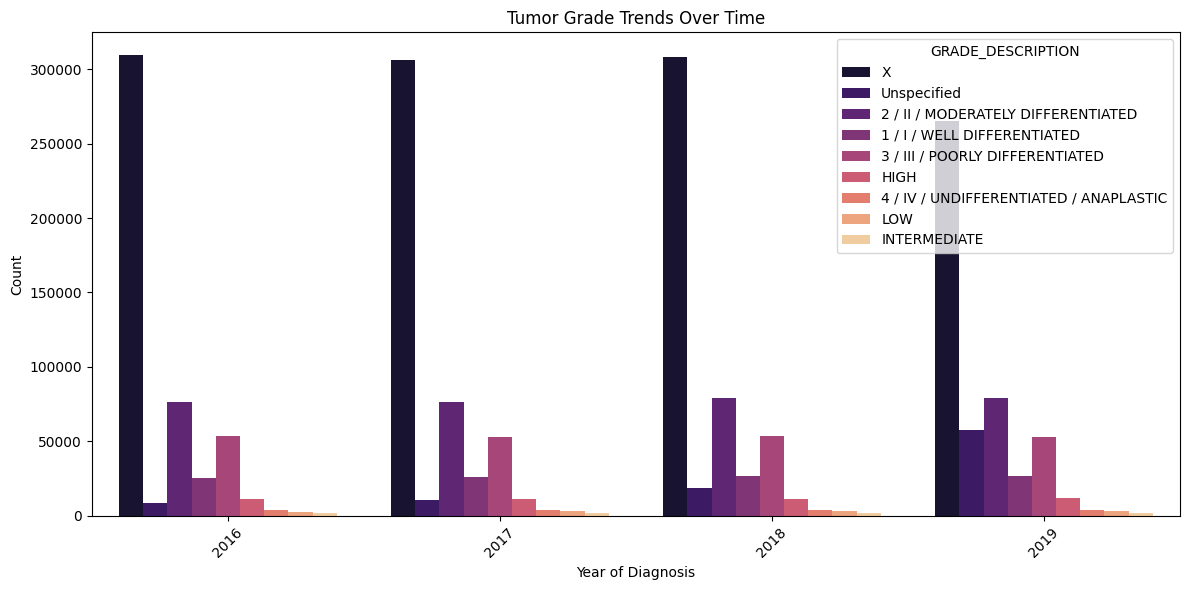

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Debugging: Confirm column existence
#print("Columns in tumour_data:")
#print(tumour_data.columns)

# Ensure DIAGNOSISDATEBEST column exists
if "DIAGNOSISDATEBEST" in tumour_data.columns:
    # Convert DIAGNOSISDATEBEST to datetime
    tumour_data["DIAGNOSISDATEBEST"] = pd.to_datetime(tumour_data["DIAGNOSISDATEBEST"], errors="coerce")

    # Drop rows with invalid or missing dates
    tumour_data = tumour_data[tumour_data["DIAGNOSISDATEBEST"].notnull()]

    # Extract the year from DIAGNOSISDATEBEST
    tumour_data["DIAGNOSIS_YEAR"] = tumour_data["DIAGNOSISDATEBEST"].dt.year

    # Debugging: Check unique values in DIAGNOSIS_YEAR and GRADE_DESCRIPTION
    print("Unique DIAGNOSIS_YEAR values:")
    print(tumour_data["DIAGNOSIS_YEAR"].unique())
    
    print("Unique GRADE_DESCRIPTION values:")
    print(tumour_data["GRADE_DESCRIPTION"].unique())

    # Plot grade trends over time
    plt.figure(figsize=(12, 6))
    sns.countplot(
        x="DIAGNOSIS_YEAR", 
        hue="GRADE_DESCRIPTION", 
        data=tumour_data, 
        palette="magma"
    )
    plt.title("Tumor Grade Trends Over Time")
    plt.xlabel("Year of Diagnosis")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("DIAGNOSISDATEBEST column not found in the dataset.")


This chart shows tumor grades from 2016 to 2019, highlighting cancer severity trends. "Moderately Differentiated" (Grade 2) is the most common grade, while "Unspecified" and "X" represent missing or unclear data. The consistent patterns emphasize the importance of complete and accurate records to improve cancer diagnosis and treatment planning.









## 4. Correlations Between Stages and Grades

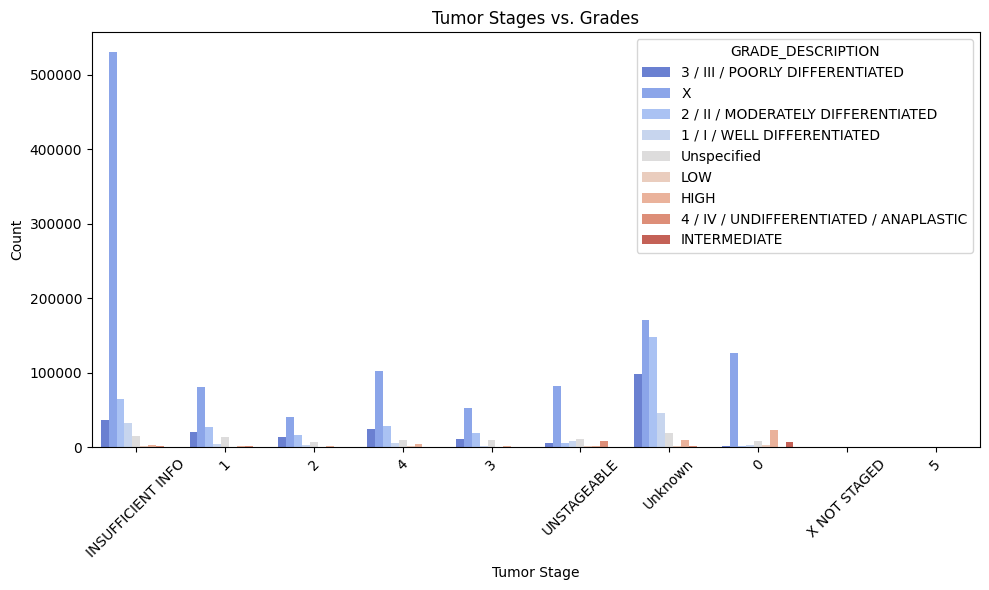

In [22]:
# Stage vs. Grade
plt.figure(figsize=(10, 6))
sns.countplot(x="STAGE_BEST_DESCRIPTION", hue="GRADE_DESCRIPTION", data=tumour_data, palette="coolwarm")
plt.title("Tumor Stages vs. Grades")
plt.xlabel("Tumor Stage")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This chart shows the relationship between tumor stages and grades. "Insufficient Info" dominates due to missing data. Stage 3 and 4 tumors commonly have aggressive grades like "Poorly Differentiated." The chart highlights incomplete data issues, emphasizing the need for accurate records to better understand cancer progression and guide treatments.

# Additional checking

In [46]:
import pandas as pd

# File paths for the datasets
patients_file_path = "C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_patient.csv"
tumor_file_path = "C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_tumour.csv"

# Load the datasets
patients_data = pd.read_csv(patients_file_path, low_memory=False)
tumor_data = pd.read_csv(tumor_file_path, low_memory=False)

# Display column names from both datasets to identify common fields
patients_columns = patients_data.columns.tolist()
tumor_columns = tumor_data.columns.tolist()

patients_columns, tumor_columns


(['PATIENTID',
  'GENDER',
  'ETHNICITY',
  'DEATHCAUSECODE_1A',
  'DEATHCAUSECODE_1B',
  'DEATHCAUSECODE_1C',
  'DEATHCAUSECODE_2',
  'DEATHCAUSECODE_UNDERLYING',
  'DEATHLOCATIONCODE',
  'VITALSTATUS',
  'VITALSTATUSDATE',
  'LINKNUMBER'],
 ['TUMOURID',
  'GENDER',
  'PATIENTID',
  'DIAGNOSISDATEBEST',
  'SITE_ICD10_O2_3CHAR',
  'SITE_ICD10_O2',
  'SITE_ICD10R4_O2_3CHAR_FROM2013',
  'SITE_ICD10R4_O2_FROM2013',
  'SITE_ICDO3REV2011',
  'SITE_ICDO3REV2011_3CHAR',
  'MORPH_ICD10_O2',
  'MORPH_ICDO3REV2011',
  'BEHAVIOUR_ICD10_O2',
  'BEHAVIOUR_ICDO3REV2011',
  'T_BEST',
  'N_BEST',
  'M_BEST',
  'STAGE_BEST',
  'GRADE',
  'AGE',
  'CREG_CODE',
  'STAGE_BEST_SYSTEM',
  'LATERALITY',
  'SCREENINGSTATUSFULL_CODE',
  'ER_STATUS',
  'PR_STATUS',
  'HER2_STATUS',
  'QUINTILE_2019',
  'DATE_FIRST_SURGERY',
  'CANCERCAREPLANINTENT',
  'PERFORMANCESTATUS',
  'CHRL_TOT_27_03',
  'COMORBIDITIES_27_03',
  'GLEASON_PRIMARY',
  'GLEASON_SECONDARY',
  'GLEASON_TERTIARY',
  'GLEASON_COMBINED'])

### Find matching entries

In [48]:
import pandas as pd

# Load datasets
patients_data = pd.read_csv("C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_patient.csv", low_memory=False)
tumor_data = pd.read_csv("C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_tumour.csv", low_memory=False)

# Find matching entries
shared_data = pd.merge(patients_data, tumor_data, on="PATIENTID", how="inner")

# Save the result to a CSV if needed
shared_data.to_csv("shared_patients_tumor_data.csv", index=False)

# Preview shared entries
print(shared_data.head())


   PATIENTID  GENDER_x ETHNICITY DEATHCAUSECODE_1A DEATHCAUSECODE_1B  \
0   10000001         1         A               NaN               NaN   
1   10000002         1       NaN               NaN               NaN   
2   10000003         2         A               NaN               NaN   
3   10000004         1         A               NaN               NaN   
4   10000005         1         A               NaN               NaN   

  DEATHCAUSECODE_1C DEATHCAUSECODE_2 DEATHCAUSECODE_UNDERLYING  \
0               NaN              NaN                       NaN   
1               NaN              NaN                       NaN   
2               NaN              NaN                       NaN   
3               NaN              NaN                       NaN   
4               NaN              NaN                       NaN   

  DEATHLOCATIONCODE VITALSTATUS  ...       QUINTILE_2019  DATE_FIRST_SURGERY  \
0               NaN           A  ...                   4                 NaN   
1         

### Count Matches

In [49]:
# Count unique PATIENTID in each dataset
patients_unique_ids = patients_data["PATIENTID"].nunique()
tumor_unique_ids = tumor_data["PATIENTID"].nunique()
shared_unique_ids = shared_data["PATIENTID"].nunique()

# Print results
print(f"Unique PATIENTID in Patients Dataset: {patients_unique_ids}")
print(f"Unique PATIENTID in Tumor Dataset: {tumor_unique_ids}")
print(f"Shared PATIENTID: {shared_unique_ids}")


Unique PATIENTID in Patients Dataset: 1871605
Unique PATIENTID in Tumor Dataset: 1871605
Shared PATIENTID: 1871605


In [50]:
# Gender distribution in shared data
gender_distribution = shared_data["GENDER_x"].value_counts()
print(gender_distribution)


GENDER_x
2    1003101
1     992467
9          2
Name: count, dtype: int64


STAGE_BEST          0      0A   0IS         1        1A     1A1     1A2  \
VITALSTATUS                                                               
A            165824.0  1327.0  55.0  125016.0  111642.0  3723.0  3805.0   
D              9630.0   331.0  11.0   26569.0   16224.0   539.0  2057.0   
D3                NaN     1.0   NaN       NaN       NaN     NaN     NaN   
D4                6.0     NaN   NaN      18.0      12.0     NaN     4.0   
D5               27.0     1.0   1.0      55.0      57.0     1.0     2.0   
X                 NaN     NaN   NaN       1.0       NaN     NaN     NaN   
X2                1.0     NaN   NaN       2.0       NaN     NaN     NaN   
X4               17.0     NaN   NaN       6.0       4.0     NaN     NaN   
X5              186.0     NaN   NaN     145.0     105.0     1.0    10.0   

STAGE_BEST      1A3   1AE  1AES  ...   L1   L2     M    M0   M1   M2    M3  \
VITALSTATUS                      ...                                         
A            1933.

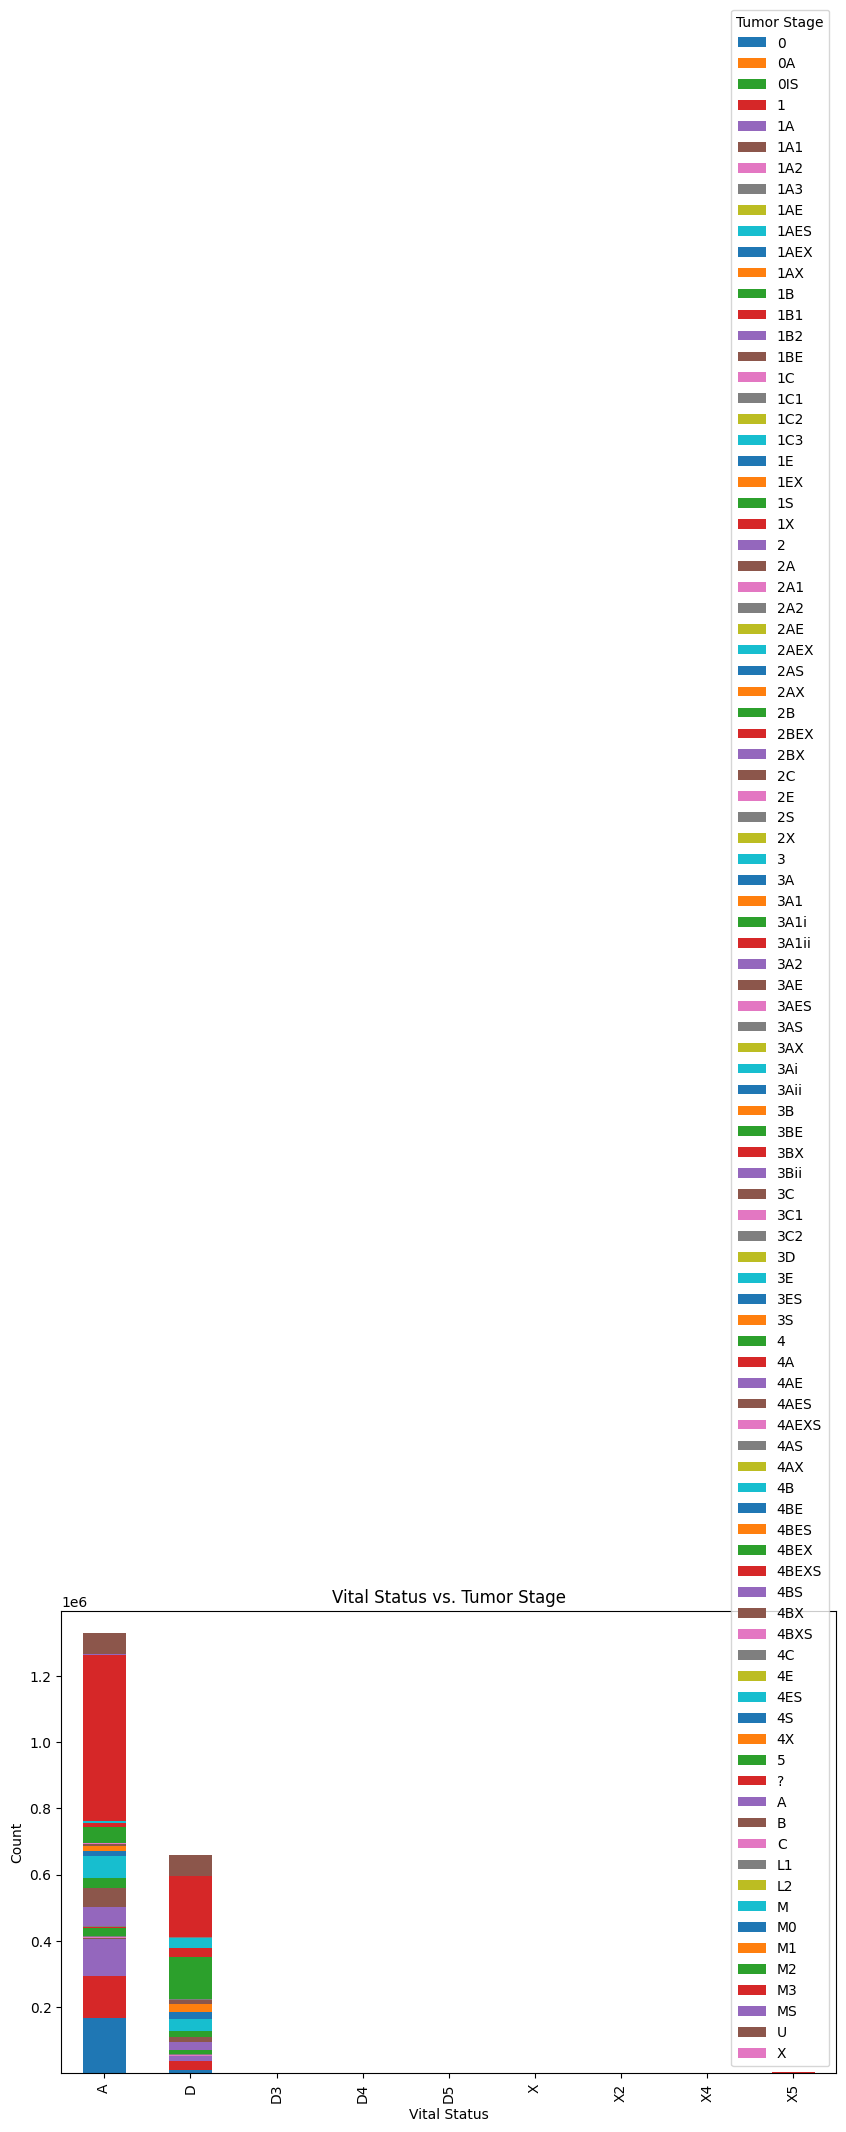

In [51]:
# Group by VITALSTATUS and STAGE_BEST
vital_stage_analysis = shared_data.groupby(["VITALSTATUS", "STAGE_BEST"]).size().unstack()
print(vital_stage_analysis)

# Visualization
import matplotlib.pyplot as plt
vital_stage_analysis.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Vital Status vs. Tumor Stage")
plt.ylabel("Count")
plt.xlabel("Vital Status")
plt.legend(title="Tumor Stage")
plt.show()


GRADE              G       G1        G2        G3      G4       GH      GI  \
VITALSTATUS                                                                  
A            71902.0  76604.0  202991.0  115574.0  5307.0  34020.0  7759.0   
D            23113.0  28409.0  107827.0   97450.0  9420.0  12368.0   498.0   
D3               NaN      1.0       2.0       2.0     NaN      NaN     NaN   
D4               7.0     12.0      37.0      40.0     5.0      3.0     NaN   
D5              37.0     58.0     151.0     118.0    12.0     14.0     NaN   
X                NaN      NaN       1.0       NaN     NaN      NaN     NaN   
X2               6.0      NaN       5.0       2.0     NaN      NaN     NaN   
X4               5.0      3.0       7.0       7.0     NaN      4.0     NaN   
X5             187.0    232.0     377.0     228.0    31.0     54.0    10.0   

GRADE            GL        GX  
VITALSTATUS                    
A            8461.0  807277.0  
D            3729.0  378368.0  
D3           

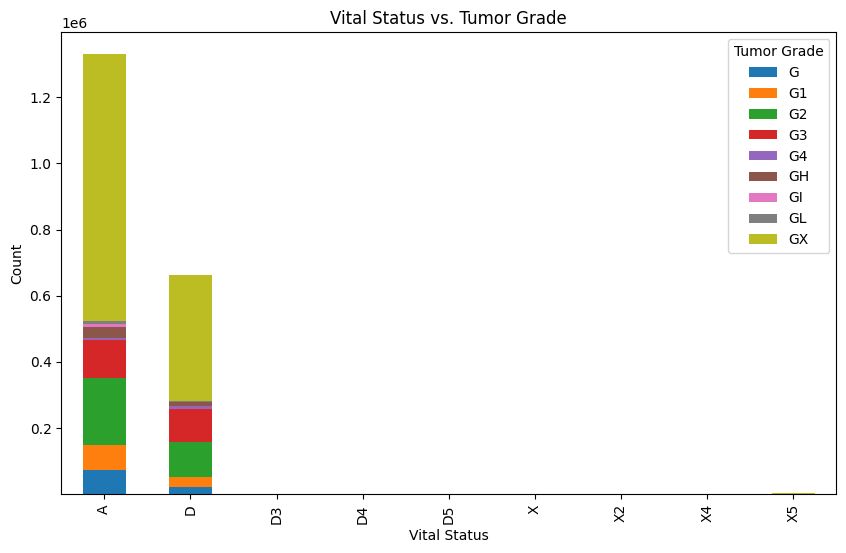

In [52]:
# Group by VITALSTATUS and GRADE
vital_grade_analysis = shared_data.groupby(["VITALSTATUS", "GRADE"]).size().unstack()
print(vital_grade_analysis)

# Visualization
vital_grade_analysis.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Vital Status vs. Tumor Grade")
plt.ylabel("Count")
plt.xlabel("Vital Status")
plt.legend(title="Tumor Grade")
plt.show()


In [54]:
unmatched_patients = patients_data[~patients_data["PATIENTID"].isin(tumor_data["PATIENTID"])]
print(f"Unmatched Patients in Patients Dataset: {unmatched_patients.shape[0]}")

unmatched_tumors = tumor_data[~tumor_data["PATIENTID"].isin(patients_data["PATIENTID"])]
print(f"Unmatched Patients in Tumor Dataset: {unmatched_tumors.shape[0]}")



Unmatched Patients in Patients Dataset: 0
Unmatched Patients in Tumor Dataset: 0


# Link Gene dataset

In [66]:
import pandas as pd

# Define file paths
gene_file_path = "C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_gene.csv"
patients_file_path = "C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_patient.csv"
tumor_file_path = "C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_tumour.csv"

# Read a sample of the gene dataset (first 100 rows) to inspect its structure
try:
    gene_sample = pd.read_csv(gene_file_path, low_memory=False, nrows=100)
    print(gene_sample.info())  # Check structure
    print(gene_sample.head())  # Preview first few rows
except Exception as e:
    print("Error loading gene dataset:", str(e))

# Load patients and tumor datasets
try:
    patients_data = pd.read_csv(patients_file_path, low_memory=False)
    tumor_data = pd.read_csv(tumor_file_path, low_memory=False)
except Exception as e:
    print("Error loading patients or tumor dataset:", str(e))

# Display column names to identify common keys for merging
print("Patients Dataset Columns:", patients_data.columns.tolist())
print("Tumor Dataset Columns:", tumor_data.columns.tolist())
print("Gene Dataset Columns:", gene_sample.columns.tolist())  # Using sample data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   GENEID                       100 non-null    int64  
 1   TUMOURID                     100 non-null    int64  
 2   PATIENTID                    100 non-null    int64  
 3   GENE_DESC                    100 non-null    object 
 4   GENE                         100 non-null    int64  
 5   COUNT_TESTS                  100 non-null    int64  
 6   COUNT_RESULTS                100 non-null    int64  
 7   COUNT_DATE                   100 non-null    int64  
 8   ALL_TESTSTATUSES             100 non-null    object 
 9   OVERALL_TS                   100 non-null    object 
 10  NO_OF_AB_GATS                100 non-null    int64  
 11  DNASEQ_GAT                   100 non-null    object 
 12  METHYL_GAT                   100 non-null    object 
 13  EXP_GAT              

In [74]:
# Step 1: Merging the Gene Dataset with Tumor and Patient Datasets

# Read gene dataset
gene_data = pd.read_csv(gene_file_path, usecols=["GENEID", "TUMOURID", "PATIENTID", "GENE_DESC"], low_memory=False)

# Read patients dataset
patients_data = pd.read_csv(patients_file_path, usecols=["PATIENTID", "GENDER", "VITALSTATUS"], low_memory=False)

# Read tumor dataset in chunks to handle memory issues
tumor_data_chunks = pd.read_csv(tumor_file_path, usecols=["TUMOURID", "PATIENTID", "STAGE_BEST", "GRADE"], low_memory=False, chunksize=50000)

# Concatenate chunks into a single DataFrame
tumor_data = pd.concat(tumor_data_chunks, ignore_index=True)

# Merge gene data with tumor data using TUMOURID
gene_tumor_merged = pd.merge(gene_data, tumor_data, on="TUMOURID", how="inner")

# Merge the result with patient data using PATIENTID
full_merged_data = pd.merge(gene_tumor_merged, patients_data, on="PATIENTID", how="inner")

# Display the merged dataset to the user
import ace_tools as tools
tools.display_dataframe_to_user(name="Merged Gene-Tumor-Patient Data", dataframe=full_merged_data)


KeyError: 'PATIENTID'